In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
 #%%

# google colab configurations 
# these might change

# torch imports
import torch

# import utils
import json
from datetime import date
import os

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


    COLAB_CONFIG = '1o5nZNVmNBq3UQRxwYIwOATX0c0GyHPRN'
    COLAB_CONFIG_FILE ='colab_config.json'

    colab_json = drive.CreateFile({'id': COLAB_CONFIG})
    colab_json.GetContentFile(COLAB_CONFIG_FILE)

    with open(COLAB_CONFIG_FILE) as f:
        temp = f.read()
    colab_config = json.loads(temp)

    for key in colab_config:
        globals()[key] = drive.CreateFile({"id":colab_config[key]['id']})
        globals()[key].GetContentFile(colab_config[key]['file'])

    from trainer import RegressionTrainer
    from datageneration import DataGenerator
    from helpers import Helper, Plotter
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

    # custom imports
    from cnp.trainer import RegressionTrainer
    from cnp.datageneration import DataGenerator
    from cnp.helpers import Helper

Running on Colab?

Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [68]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'arch_imp.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [69]:

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['multiple_functions']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['multiple_functions']['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


## Generating data on the fly from a simple function.

In [83]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['multiple_functions']['experiment_params'])

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 24.104787826538086
 Validation loss after 0 equals                     152.818359375


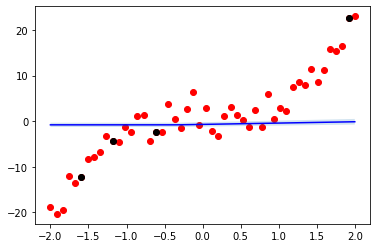

  1%|          | 81/10000 [00:00<08:08, 20.30it/s]

Mean loss at epoch 100 : 31.938112258911133
 Validation loss after 100 equals                     61.54484558105469


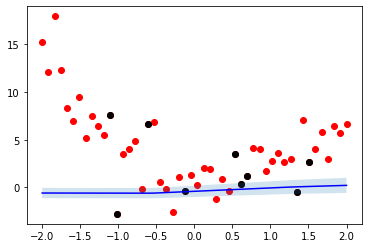

  2%|▏         | 171/10000 [00:01<03:15, 50.36it/s]

Mean loss at epoch 200 : 33.8012580871582
 Validation loss after 200 equals                     21.27857208251953


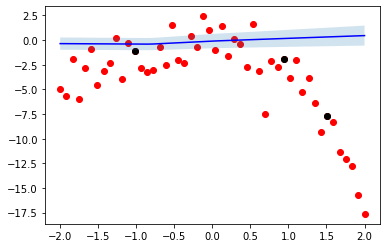

  3%|▎         | 271/10000 [00:01<01:31, 106.55it/s]

Mean loss at epoch 300 : 8.67736530303955
 Validation loss after 300 equals                     30.842992782592773


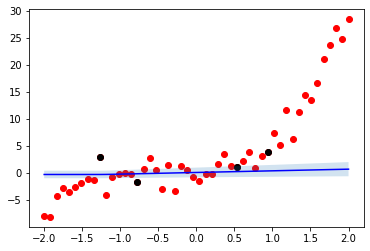

  4%|▍         | 397/10000 [00:01<00:48, 196.05it/s]

Mean loss at epoch 400 : 56.43544387817383
 Validation loss after 400 equals                     18.04859161376953


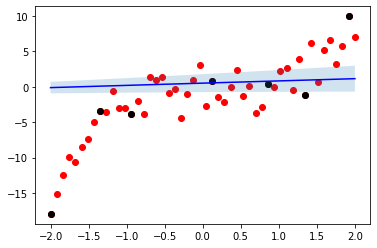

  5%|▌         | 500/10000 [00:02<00:40, 232.36it/s]

Mean loss at epoch 500 : 8.776912689208984
 Validation loss after 500 equals                     4.659913539886475


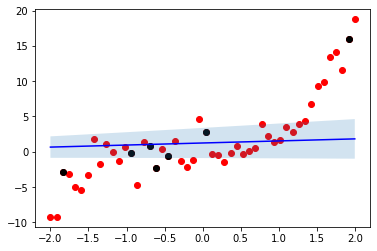

  6%|▌         | 569/10000 [00:02<00:42, 224.44it/s]

Mean loss at epoch 600 : 10.976252555847168
 Validation loss after 600 equals                     5.012019157409668


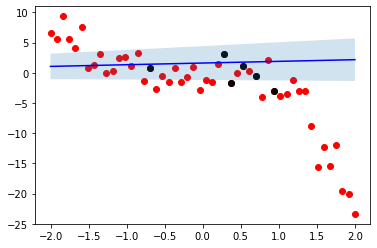

  7%|▋         | 679/10000 [00:03<00:41, 226.00it/s]

Mean loss at epoch 700 : 7.960252285003662
 Validation loss after 700 equals                     4.761680603027344


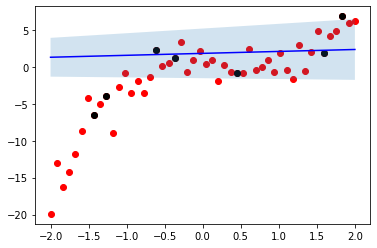

  8%|▊         | 800/10000 [00:03<00:43, 213.11it/s]

Mean loss at epoch 800 : 5.449712753295898
 Validation loss after 800 equals                     3.186319589614868


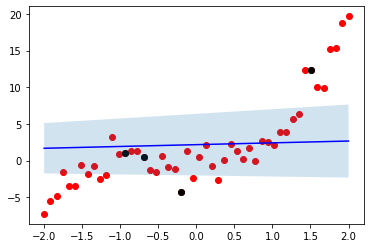

  9%|▉         | 893/10000 [00:04<00:40, 223.83it/s]

Mean loss at epoch 900 : 3.8861682415008545
 Validation loss after 900 equals                     2.666191816329956


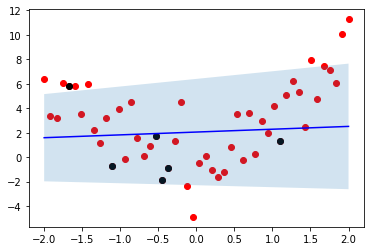

 10%|▉         | 974/10000 [00:04<00:45, 197.50it/s]

Mean loss at epoch 1000 : 2.7041256427764893
 Validation loss after 1000 equals                     4.0299787521362305


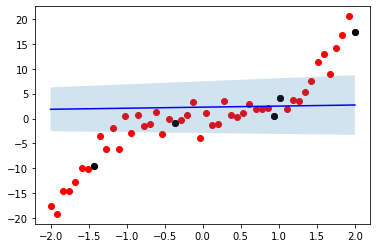

 11%|█         | 1083/10000 [00:05<00:39, 223.01it/s]

Mean loss at epoch 1100 : 3.1591644287109375
 Validation loss after 1100 equals                     2.697277307510376


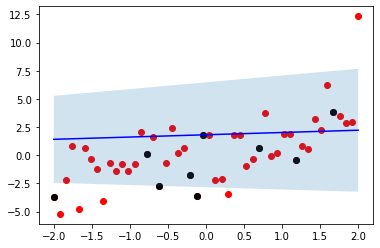

 12%|█▏        | 1190/10000 [00:05<00:40, 218.11it/s]

Mean loss at epoch 1200 : 3.7676682472229004
 Validation loss after 1200 equals                     2.7922143936157227


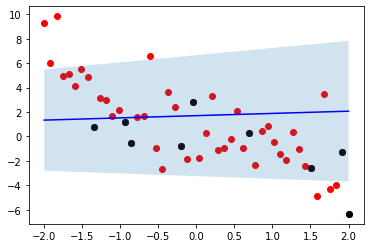

 13%|█▎        | 1285/10000 [00:06<00:45, 192.23it/s]

Mean loss at epoch 1300 : 2.8533380031585693
 Validation loss after 1300 equals                     3.4385714530944824


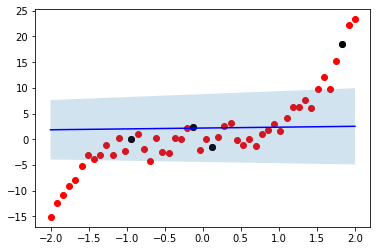

 14%|█▍        | 1375/10000 [00:07<00:56, 152.76it/s]

Mean loss at epoch 1400 : 2.8258066177368164
 Validation loss after 1400 equals                     3.2184877395629883


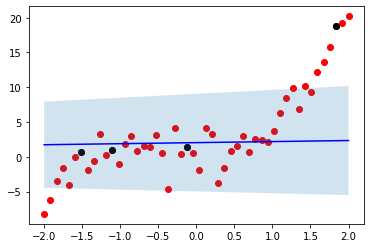

 15%|█▍        | 1468/10000 [00:07<00:42, 203.08it/s]

Mean loss at epoch 1500 : 2.9581735134124756
 Validation loss after 1500 equals                     3.891958713531494


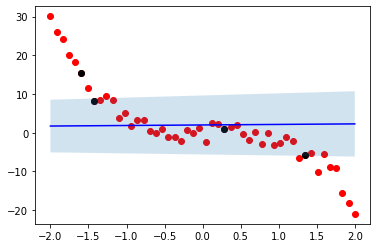

 16%|█▌        | 1565/10000 [00:08<00:36, 228.88it/s]

Mean loss at epoch 1600 : 3.510366201400757
 Validation loss after 1600 equals                     4.364243507385254


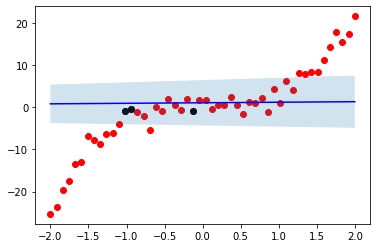

 17%|█▋        | 1689/10000 [00:08<00:33, 247.64it/s]

Mean loss at epoch 1700 : 4.181446075439453
 Validation loss after 1700 equals                     2.957911968231201


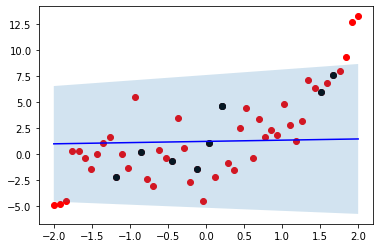

 18%|█▊        | 1790/10000 [00:08<00:32, 250.45it/s]

Mean loss at epoch 1800 : 3.242452383041382
 Validation loss after 1800 equals                     2.915405035018921


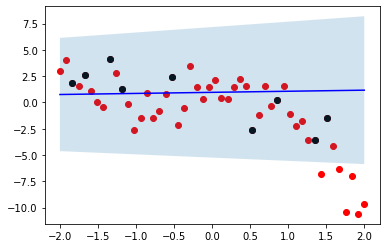

 19%|█▉        | 1897/10000 [00:09<00:30, 261.48it/s]

Mean loss at epoch 1900 : 2.91611385345459
 Validation loss after 1900 equals                     3.2350711822509766


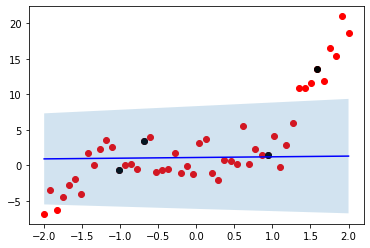

 20%|█▉        | 1993/10000 [00:09<00:33, 237.22it/s]

Mean loss at epoch 2000 : 2.971409797668457
 Validation loss after 2000 equals                     3.2779130935668945


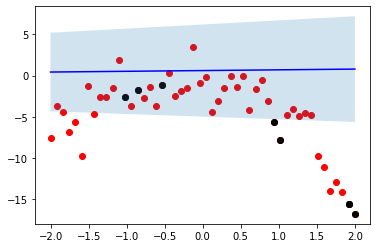

 21%|██        | 2076/10000 [00:10<00:37, 209.75it/s]

Mean loss at epoch 2100 : 3.802907705307007
 Validation loss after 2100 equals                     4.376479148864746


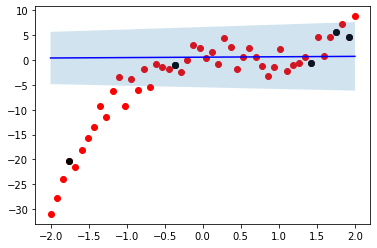

 22%|██▏       | 2173/10000 [00:10<00:34, 224.81it/s]

Mean loss at epoch 2200 : 4.199807643890381
 Validation loss after 2200 equals                     2.8090155124664307


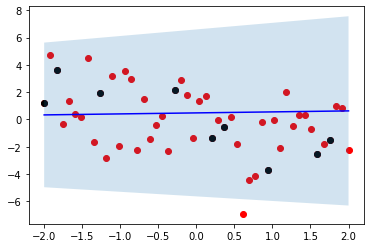

 23%|██▎       | 2276/10000 [00:11<00:30, 249.65it/s]

Mean loss at epoch 2300 : 3.2173349857330322
 Validation loss after 2300 equals                     3.14555287361145


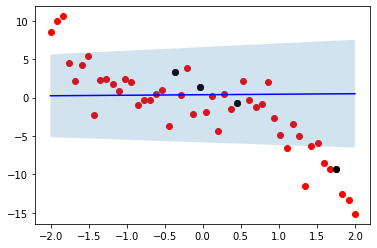

 24%|██▍       | 2381/10000 [00:11<00:29, 261.95it/s]

Mean loss at epoch 2400 : 2.874474287033081
 Validation loss after 2400 equals                     3.5480847358703613


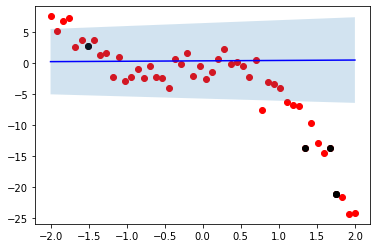

 25%|██▍       | 2495/10000 [00:12<00:30, 247.61it/s]

Mean loss at epoch 2500 : 3.310075283050537
 Validation loss after 2500 equals                     3.0314459800720215


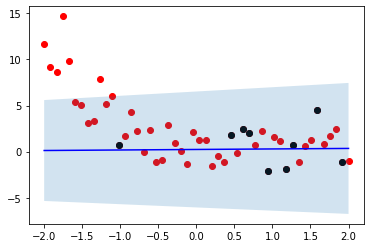

 26%|██▌       | 2596/10000 [00:12<00:29, 253.14it/s]

Mean loss at epoch 2600 : 3.0860443115234375
 Validation loss after 2600 equals                     4.08773946762085


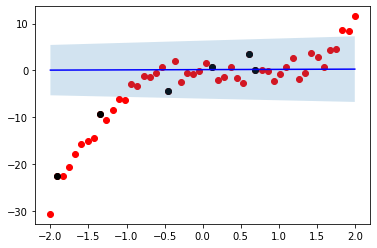

 27%|██▋       | 2685/10000 [00:13<00:31, 230.75it/s]

Mean loss at epoch 2700 : 3.437760829925537
 Validation loss after 2700 equals                     2.903219223022461


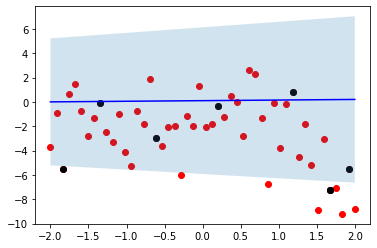

 28%|██▊       | 2772/10000 [00:13<00:34, 208.48it/s]

Mean loss at epoch 2800 : 3.5575060844421387
 Validation loss after 2800 equals                     3.996147871017456


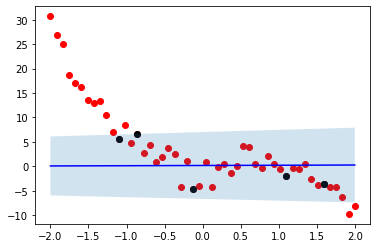

 29%|██▊       | 2872/10000 [00:14<00:33, 215.78it/s]

Mean loss at epoch 2900 : 3.0812761783599854
 Validation loss after 2900 equals                     3.0346076488494873


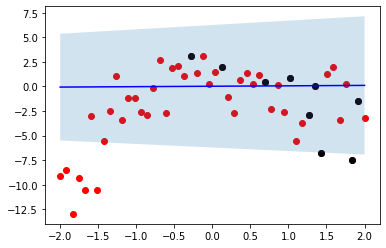

 30%|██▉       | 2999/10000 [00:14<00:30, 227.01it/s]

Mean loss at epoch 3000 : 3.4099481105804443
 Validation loss after 3000 equals                     3.037435293197632


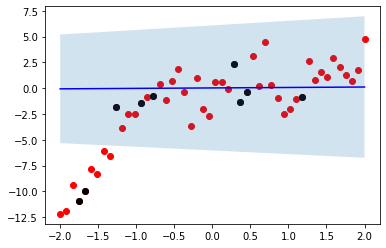

 31%|███       | 3083/10000 [00:15<00:32, 214.58it/s]

Mean loss at epoch 3100 : 3.5095794200897217
 Validation loss after 3100 equals                     2.846944570541382


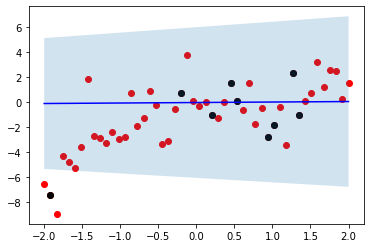

 32%|███▏      | 3168/10000 [00:15<00:33, 203.61it/s]

Mean loss at epoch 3200 : 3.6469292640686035
 Validation loss after 3200 equals                     3.589104413986206


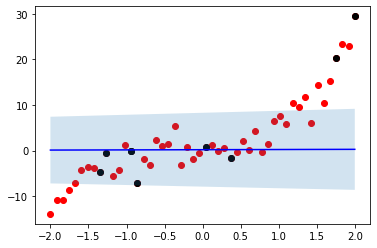

 33%|███▎      | 3283/10000 [00:16<00:29, 224.92it/s]

Mean loss at epoch 3300 : 2.955021858215332
 Validation loss after 3300 equals                     2.8248367309570312


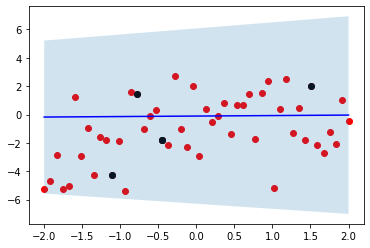

 34%|███▎      | 3372/10000 [00:16<00:30, 216.67it/s]

Mean loss at epoch 3400 : 4.03620719909668
 Validation loss after 3400 equals                     3.4453647136688232


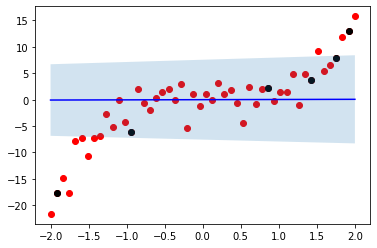

 35%|███▍      | 3479/10000 [00:17<00:30, 217.28it/s]

Mean loss at epoch 3500 : 3.955207586288452
 Validation loss after 3500 equals                     3.1599419116973877


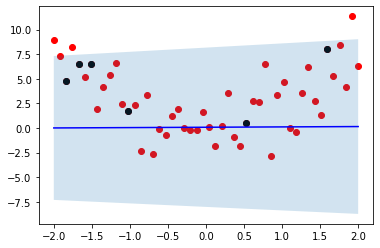

 36%|███▌      | 3590/10000 [00:17<00:29, 218.10it/s]

Mean loss at epoch 3600 : 3.3421621322631836
 Validation loss after 3600 equals                     3.624276638031006


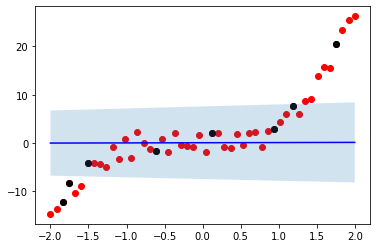

 37%|███▋      | 3690/10000 [00:18<00:26, 239.62it/s]

Mean loss at epoch 3700 : 3.469381332397461
 Validation loss after 3700 equals                     3.458580255508423


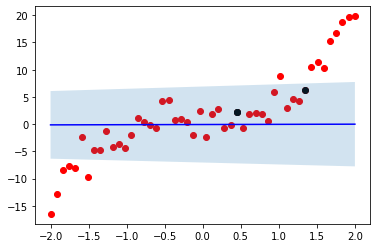

 38%|███▊      | 3772/10000 [00:18<00:33, 187.31it/s]

Mean loss at epoch 3800 : 3.235839605331421
 Validation loss after 3800 equals                     2.9976937770843506


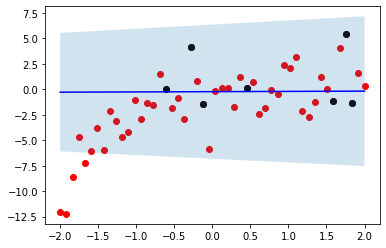

 39%|███▉      | 3891/10000 [00:19<00:27, 221.85it/s]

Mean loss at epoch 3900 : 3.802600622177124
 Validation loss after 3900 equals                     2.8807947635650635


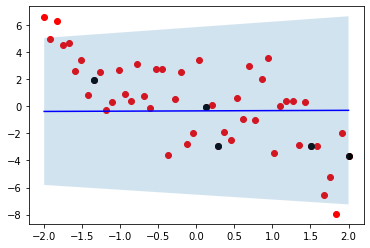

 40%|███▉      | 3992/10000 [00:19<00:25, 234.59it/s]

Mean loss at epoch 4000 : 2.979081392288208
 Validation loss after 4000 equals                     3.237861394882202


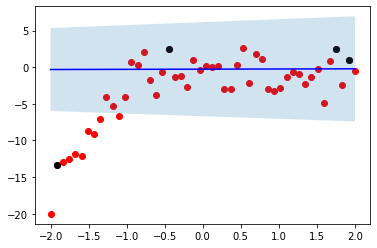

 41%|████      | 4098/10000 [00:20<00:23, 255.37it/s]

Mean loss at epoch 4100 : 3.3159067630767822
 Validation loss after 4100 equals                     3.345004081726074


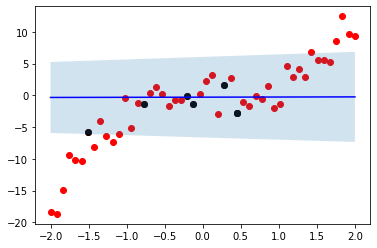

 42%|████▏     | 4168/10000 [00:20<00:24, 239.27it/s]

Mean loss at epoch 4200 : 2.8597781658172607
 Validation loss after 4200 equals                     2.984189987182617


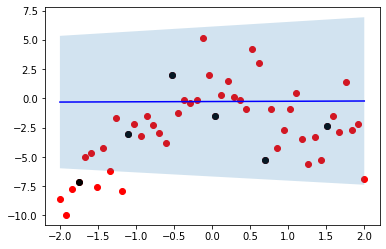

 43%|████▎     | 4269/10000 [00:20<00:24, 237.08it/s]

Mean loss at epoch 4300 : 3.416888952255249
 Validation loss after 4300 equals                     3.6973929405212402


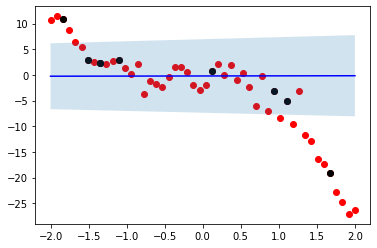

 44%|████▍     | 4385/10000 [00:21<00:23, 243.03it/s]

Mean loss at epoch 4400 : 3.570896625518799
 Validation loss after 4400 equals                     2.990170478820801


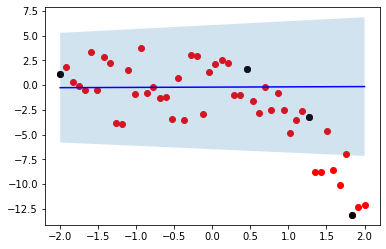

 45%|████▍     | 4492/10000 [00:22<00:31, 174.62it/s]

Mean loss at epoch 4500 : 3.416501998901367
 Validation loss after 4500 equals                     3.3324146270751953


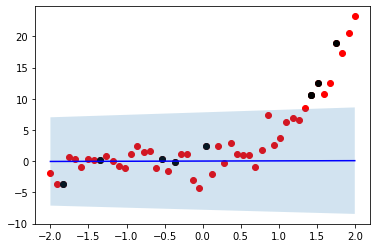

 46%|████▌     | 4575/10000 [00:22<00:31, 173.22it/s]

Mean loss at epoch 4600 : 3.9699621200561523
 Validation loss after 4600 equals                     2.9263875484466553


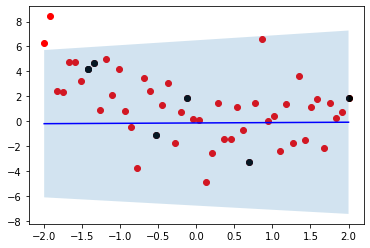

 47%|████▋     | 4670/10000 [00:23<00:26, 197.68it/s]

Mean loss at epoch 4700 : 3.859677791595459
 Validation loss after 4700 equals                     3.1155014038085938


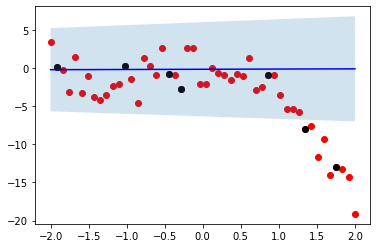

 48%|████▊     | 4800/10000 [00:23<00:20, 247.68it/s]

Mean loss at epoch 4800 : 3.0441110134124756
 Validation loss after 4800 equals                     3.327500104904175


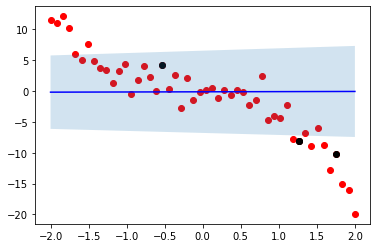

 49%|████▊     | 4867/10000 [00:24<00:22, 227.53it/s]

Mean loss at epoch 4900 : 2.8623857498168945
 Validation loss after 4900 equals                     3.0411553382873535


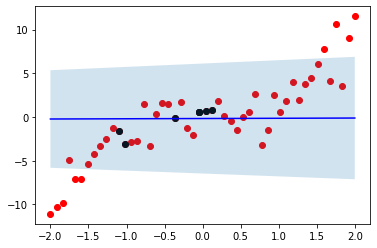

 50%|████▉     | 4973/10000 [00:24<00:19, 259.02it/s]

Mean loss at epoch 5000 : 3.9137816429138184
 Validation loss after 5000 equals                     3.18684720993042


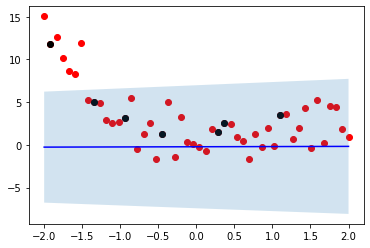

 51%|█████     | 5087/10000 [00:25<00:20, 244.55it/s]

Mean loss at epoch 5100 : 2.9821393489837646
 Validation loss after 5100 equals                     4.190873622894287


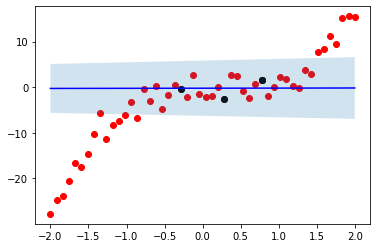

 52%|█████▏    | 5198/10000 [00:25<00:21, 227.81it/s]

Mean loss at epoch 5200 : 3.101503610610962
 Validation loss after 5200 equals                     3.3105521202087402


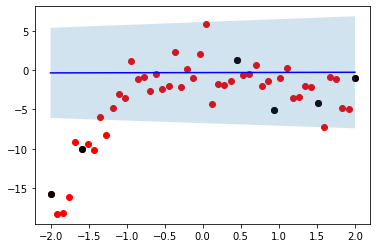

 53%|█████▎    | 5286/10000 [00:26<00:21, 220.69it/s]

Mean loss at epoch 5300 : 3.311556816101074
 Validation loss after 5300 equals                     3.249446392059326


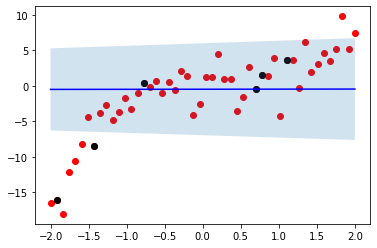

 54%|█████▍    | 5376/10000 [00:26<00:21, 213.91it/s]

Mean loss at epoch 5400 : 2.889676570892334
 Validation loss after 5400 equals                     3.817861557006836


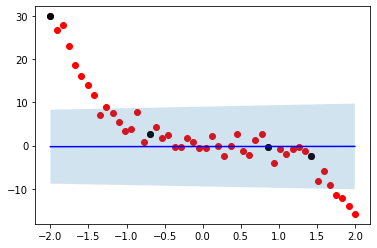

 55%|█████▍    | 5486/10000 [00:27<00:19, 229.40it/s]

Mean loss at epoch 5500 : 3.180845022201538
 Validation loss after 5500 equals                     3.352757453918457


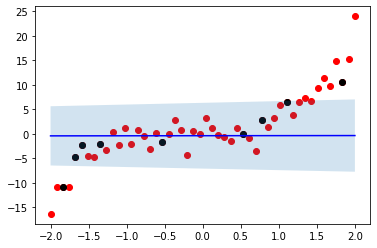

 56%|█████▌    | 5576/10000 [00:27<00:20, 215.96it/s]

Mean loss at epoch 5600 : 3.819281578063965
 Validation loss after 5600 equals                     4.395113468170166


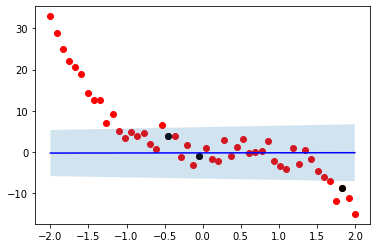

 57%|█████▋    | 5693/10000 [00:28<00:17, 241.41it/s]

Mean loss at epoch 5700 : 3.9034860134124756
 Validation loss after 5700 equals                     3.105097770690918


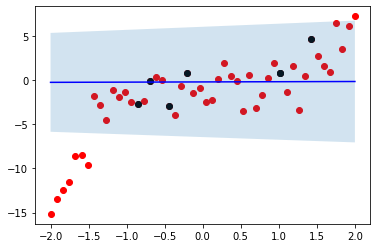

 58%|█████▊    | 5788/10000 [00:28<00:18, 228.05it/s]

Mean loss at epoch 5800 : 3.1302924156188965
 Validation loss after 5800 equals                     3.275223970413208


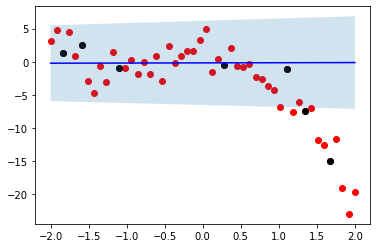

 59%|█████▊    | 5871/10000 [00:28<00:19, 215.73it/s]

Mean loss at epoch 5900 : 3.3288564682006836
 Validation loss after 5900 equals                     3.5106167793273926


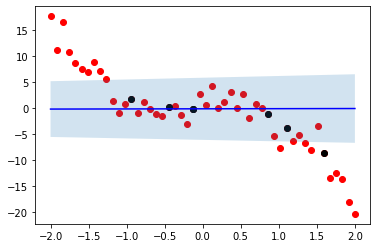

 60%|█████▉    | 5998/10000 [00:29<00:16, 246.12it/s]

Mean loss at epoch 6000 : 3.143143653869629
 Validation loss after 6000 equals                     2.90902042388916


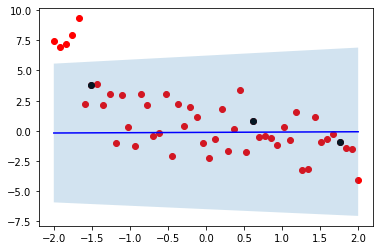

 61%|██████    | 6086/10000 [00:29<00:17, 229.55it/s]

Mean loss at epoch 6100 : 3.13740873336792
 Validation loss after 6100 equals                     3.1340596675872803


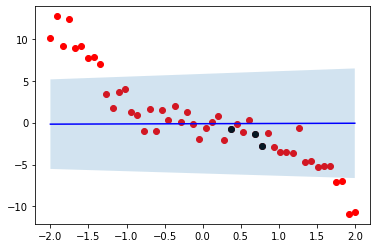

 62%|██████▏   | 6168/10000 [00:30<00:19, 194.13it/s]

Mean loss at epoch 6200 : 2.8973424434661865
 Validation loss after 6200 equals                     3.3665196895599365


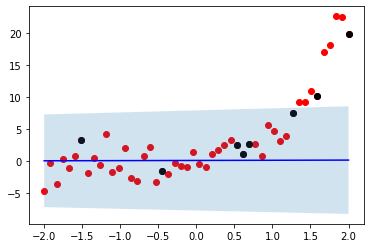

 63%|██████▎   | 6284/10000 [00:31<00:16, 228.82it/s]

Mean loss at epoch 6300 : 3.0655384063720703
 Validation loss after 6300 equals                     3.8966078758239746


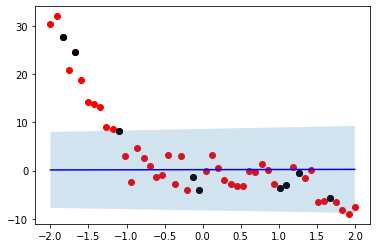

 64%|██████▍   | 6398/10000 [00:31<00:14, 240.46it/s]

Mean loss at epoch 6400 : 3.054172992706299
 Validation loss after 6400 equals                     3.1604514122009277


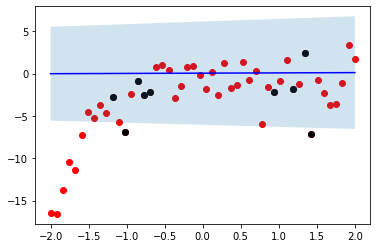

 65%|██████▍   | 6476/10000 [00:32<00:20, 171.81it/s]

Mean loss at epoch 6500 : 3.9763898849487305
 Validation loss after 6500 equals                     3.1708691120147705


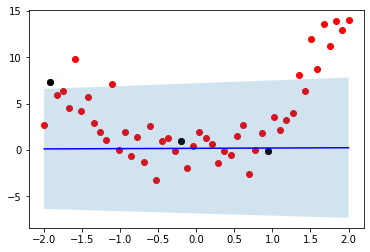

 66%|██████▌   | 6600/10000 [00:32<00:15, 226.55it/s]

Mean loss at epoch 6600 : 3.048168897628784
 Validation loss after 6600 equals                     3.1899254322052


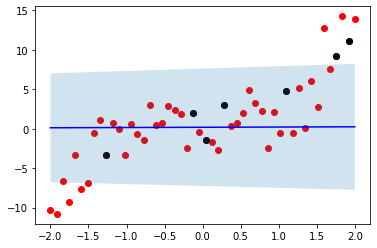

 67%|██████▋   | 6688/10000 [00:33<00:14, 221.24it/s]

Mean loss at epoch 6700 : 2.934645652770996
 Validation loss after 6700 equals                     3.1047544479370117


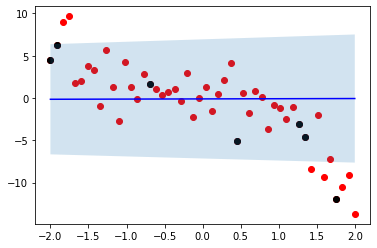

 68%|██████▊   | 6776/10000 [00:33<00:14, 216.28it/s]

Mean loss at epoch 6800 : 3.164991855621338
 Validation loss after 6800 equals                     2.988252878189087


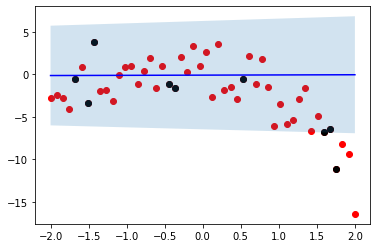

 69%|██████▊   | 6869/10000 [00:34<00:13, 229.94it/s]

Mean loss at epoch 6900 : 2.84159779548645
 Validation loss after 6900 equals                     3.242319107055664


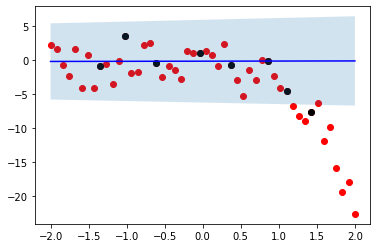

 70%|██████▉   | 6972/10000 [00:34<00:12, 247.79it/s]

Mean loss at epoch 7000 : 2.884187698364258
 Validation loss after 7000 equals                     2.82450008392334


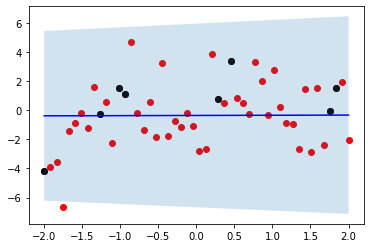

 71%|███████   | 7085/10000 [00:35<00:13, 220.42it/s]

Mean loss at epoch 7100 : 3.147517204284668
 Validation loss after 7100 equals                     3.862480878829956


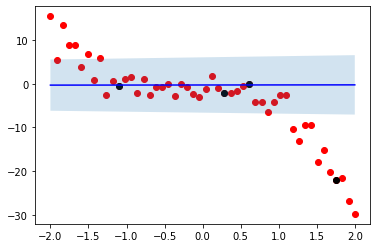

 72%|███████▏  | 7171/10000 [00:35<00:13, 214.01it/s]

Mean loss at epoch 7200 : 3.021768808364868
 Validation loss after 7200 equals                     3.4281232357025146


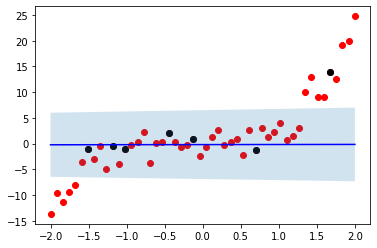

 73%|███████▎  | 7297/10000 [00:36<00:11, 231.07it/s]

Mean loss at epoch 7300 : 2.963913917541504
 Validation loss after 7300 equals                     2.8240745067596436


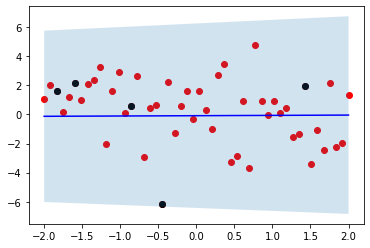

 74%|███████▍  | 7391/10000 [00:36<00:15, 166.34it/s]

Mean loss at epoch 7400 : 2.8664352893829346
 Validation loss after 7400 equals                     3.5502805709838867


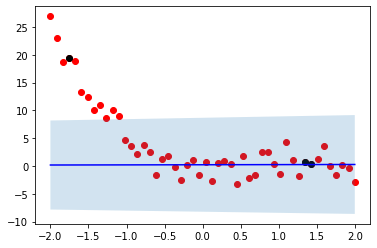

 75%|███████▌  | 7500/10000 [00:37<00:16, 154.46it/s]

Mean loss at epoch 7500 : 2.7605371475219727
 Validation loss after 7500 equals                     3.9093565940856934


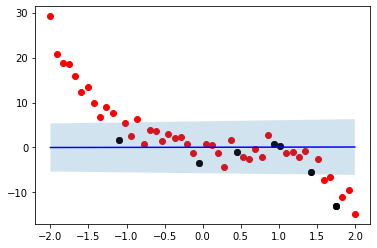

 76%|███████▌  | 7591/10000 [00:38<00:20, 119.26it/s]

Mean loss at epoch 7600 : 3.361328363418579
 Validation loss after 7600 equals                     3.3506522178649902


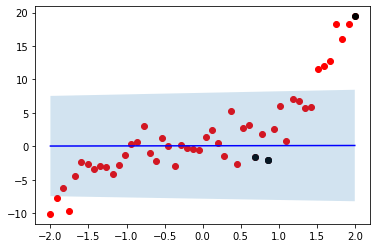

 77%|███████▋  | 7698/10000 [00:39<00:15, 146.68it/s]

Mean loss at epoch 7700 : 3.0967698097229004
 Validation loss after 7700 equals                     3.6003363132476807


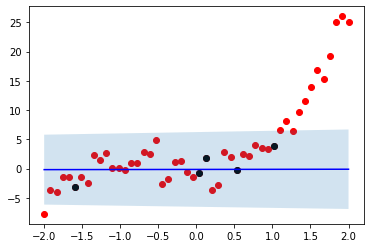

 78%|███████▊  | 7782/10000 [00:40<00:15, 140.87it/s]

Mean loss at epoch 7800 : 4.137579441070557
 Validation loss after 7800 equals                     3.805152654647827


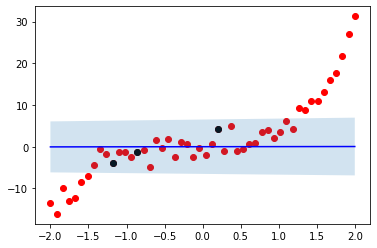

 79%|███████▉  | 7883/10000 [00:41<00:15, 133.05it/s]

Mean loss at epoch 7900 : 3.717679738998413
 Validation loss after 7900 equals                     3.3388736248016357


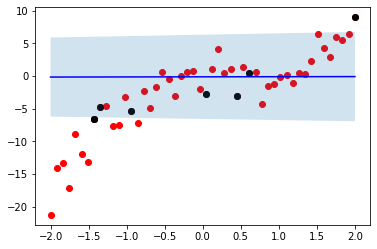

 80%|███████▉  | 7998/10000 [00:42<00:12, 155.83it/s]

Mean loss at epoch 8000 : 2.968806505203247
 Validation loss after 8000 equals                     2.93731689453125


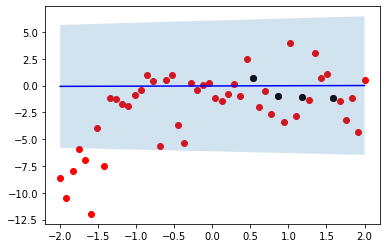

 81%|████████  | 8072/10000 [00:42<00:12, 150.87it/s]

Mean loss at epoch 8100 : 3.0007381439208984
 Validation loss after 8100 equals                     3.030747175216675


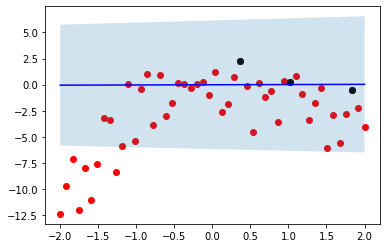

 82%|████████▏ | 8199/10000 [00:43<00:10, 166.49it/s]

Mean loss at epoch 8200 : 3.6715641021728516
 Validation loss after 8200 equals                     3.939560890197754


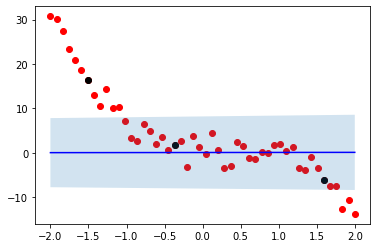

 83%|████████▎ | 8278/10000 [00:44<00:10, 171.19it/s]

Mean loss at epoch 8300 : 3.1773738861083984
 Validation loss after 8300 equals                     3.3091025352478027


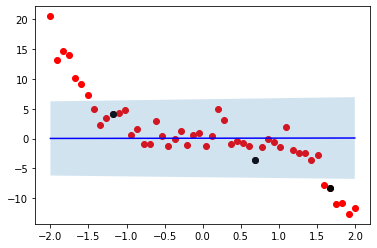

 84%|████████▍ | 8377/10000 [00:44<00:09, 176.21it/s]

Mean loss at epoch 8400 : 2.970668315887451
 Validation loss after 8400 equals                     3.134808301925659


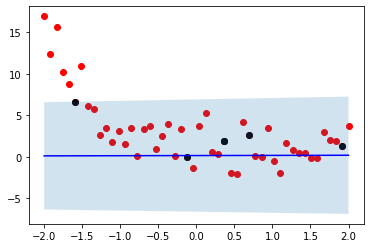

 85%|████████▍ | 8492/10000 [00:45<00:08, 185.85it/s]

Mean loss at epoch 8500 : 3.095167875289917
 Validation loss after 8500 equals                     3.275724411010742


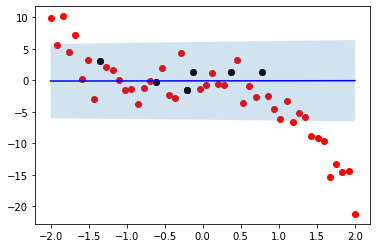

 86%|████████▌ | 8580/10000 [00:46<00:08, 169.86it/s]

Mean loss at epoch 8600 : 3.8289361000061035
 Validation loss after 8600 equals                     3.501002550125122


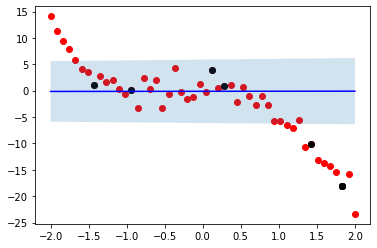

 87%|████████▋ | 8687/10000 [00:47<00:09, 131.87it/s]

Mean loss at epoch 8700 : 3.504335880279541
 Validation loss after 8700 equals                     3.6776645183563232


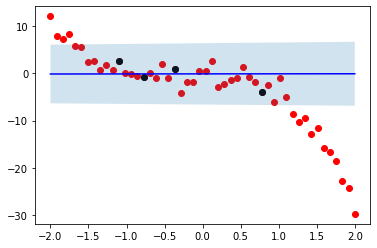

 88%|████████▊ | 8800/10000 [00:47<00:06, 197.01it/s]

Mean loss at epoch 8800 : 3.325737237930298
 Validation loss after 8800 equals                     3.1795666217803955


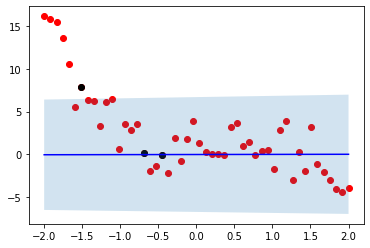

 89%|████████▉ | 8888/10000 [00:48<00:05, 204.22it/s]

Mean loss at epoch 8900 : 3.1941864490509033
 Validation loss after 8900 equals                     2.9218950271606445


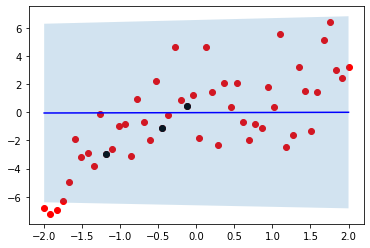

 90%|████████▉ | 8980/10000 [00:48<00:04, 205.59it/s]

Mean loss at epoch 9000 : 3.990884780883789
 Validation loss after 9000 equals                     3.0875189304351807


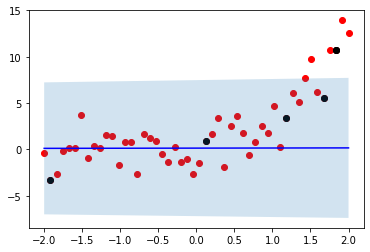

 91%|█████████ | 9066/10000 [00:49<00:04, 216.06it/s]

Mean loss at epoch 9100 : 3.0440139770507812
 Validation loss after 9100 equals                     3.288583993911743


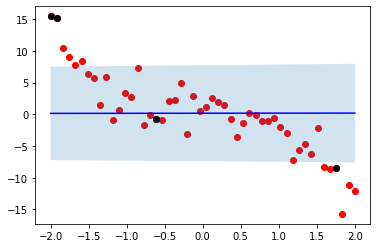

 92%|█████████▏| 9169/10000 [00:49<00:03, 248.32it/s]

Mean loss at epoch 9200 : 3.0949597358703613
 Validation loss after 9200 equals                     3.321115732192993


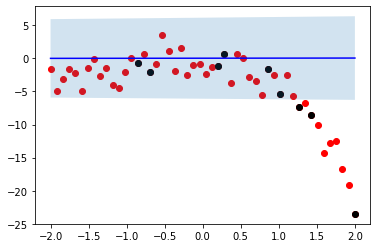

 93%|█████████▎| 9299/10000 [00:50<00:02, 266.39it/s]

Mean loss at epoch 9300 : 3.2033567428588867
 Validation loss after 9300 equals                     3.6034152507781982


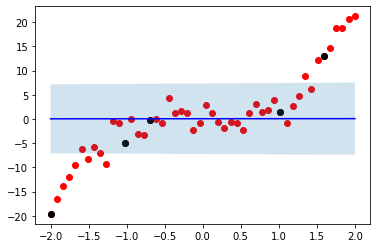

 94%|█████████▍| 9400/10000 [00:50<00:02, 254.69it/s]

Mean loss at epoch 9400 : 3.6206955909729004
 Validation loss after 9400 equals                     2.8353939056396484


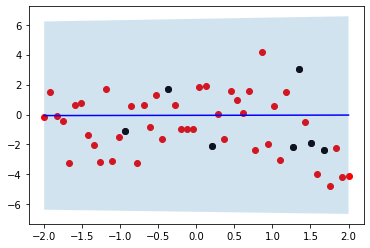

 95%|█████████▌| 9500/10000 [00:50<00:02, 248.09it/s]

Mean loss at epoch 9500 : 3.948071241378784
 Validation loss after 9500 equals                     3.8534488677978516


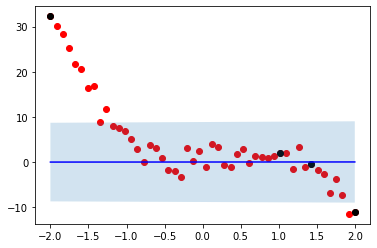

 96%|█████████▌| 9589/10000 [00:51<00:02, 166.18it/s]

Mean loss at epoch 9600 : 2.810420036315918
 Validation loss after 9600 equals                     3.075791358947754


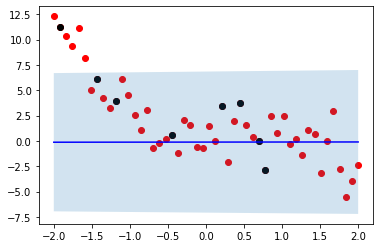

 97%|█████████▋| 9684/10000 [00:52<00:01, 174.73it/s]

Mean loss at epoch 9700 : 3.687762498855591
 Validation loss after 9700 equals                     2.9951276779174805


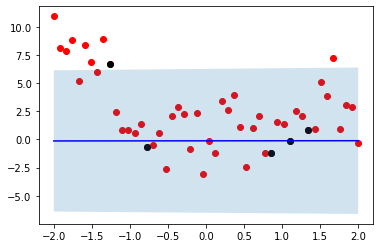

 98%|█████████▊| 9788/10000 [00:53<00:01, 175.61it/s]

Mean loss at epoch 9800 : 3.651731491088867
 Validation loss after 9800 equals                     3.445294141769409


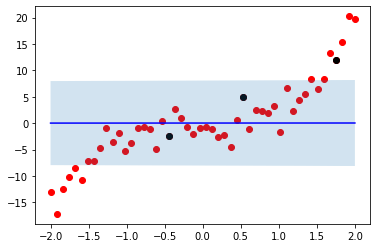

 99%|█████████▉| 9900/10000 [00:53<00:00, 159.41it/s]

Mean loss at epoch 9900 : 3.4011828899383545
 Validation loss after 9900 equals                     3.2514476776123047


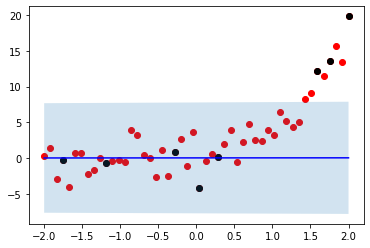

100%|██████████| 10000/10000 [00:55<00:00, 181.39it/s]


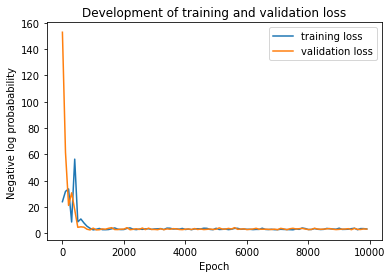

In [84]:
model_weights = trainer.run_training(**default_conf['multiple_functions']['training_params'])



In [72]:
list(trainer._cnp.encoder.parameters())

[Parameter containing:
 tensor([[ 0.2153,  0.2850],
         [-0.1618,  0.6099]], requires_grad=True),
 Parameter containing:
 tensor([-0.5447,  0.2440], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2778, -0.2076],
         [ 0.6317, -0.2890]], requires_grad=True),
 Parameter containing:
 tensor([-0.0471, -0.4662], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1934, -0.0725],
         [-0.6474,  0.0425]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1307, -0.3898], requires_grad=True),
 Parameter containing:
 tensor([[-0.5546, -0.5499],
         [ 0.5831, -0.5290]], requires_grad=True),
 Parameter containing:
 tensor([-0.2915, -0.1124], requires_grad=True)]

In [23]:
default_conf['multiple_functions']['experiment_params']

{'datagenerator': 'cnp.datageneration.PolynomialRegression',
 'dim_observation': 50,
 'dimout': 2,
 'dimr': 128,
 'dimx': 1,
 'dimy': 1,
 'dropout': 0,
 'lr': 0.0001,
 'max_contx': 10,
 'max_funcs': 10,
 'min_contx': 3,
 'min_funcs': 2,
 'n_epochs': 10000,
 'num_layers_decoder': 3,
 'num_layers_encoder': 4,
 'num_neurons_decoder': 2,
 'num_neurons_encoder': 128,
 'print_after': 100,
 'range_x': [-2, 2],
 'train_on_gpu': False}

In [57]:
dir(trainer._cnp.encoder)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_dimr',
 '_dimx',
 '_dimy',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_hidden_layers',
 '_layers',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_parameters',
 '_process_input',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',
 'buffers',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 

In [85]:
!pwd

/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/architecture_improvement
